In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/merged_data.csv"  # Adjust the path if needed
df = pd.read_csv(file_path)

# Define the 20th and 80th percentile thresholds
lower_bound = df['forecast_error'].quantile(0.20)
upper_bound = df['forecast_error'].quantile(0.80)

# Filter out values outside this range
df_filtered = df[(df['forecast_error'] >= lower_bound) & (df['forecast_error'] <= upper_bound)]

# Display summary after filtering
print(f"Original Data Size: {df.shape[0]}")
print(f"Filtered Data Size: {df_filtered.shape[0]}")
print(f"Removed Rows: {df.shape[0] - df_filtered.shape[0]}")

# Save the filtered data if needed
df_filtered.to_csv("filtered_merged_data.csv", index=False)


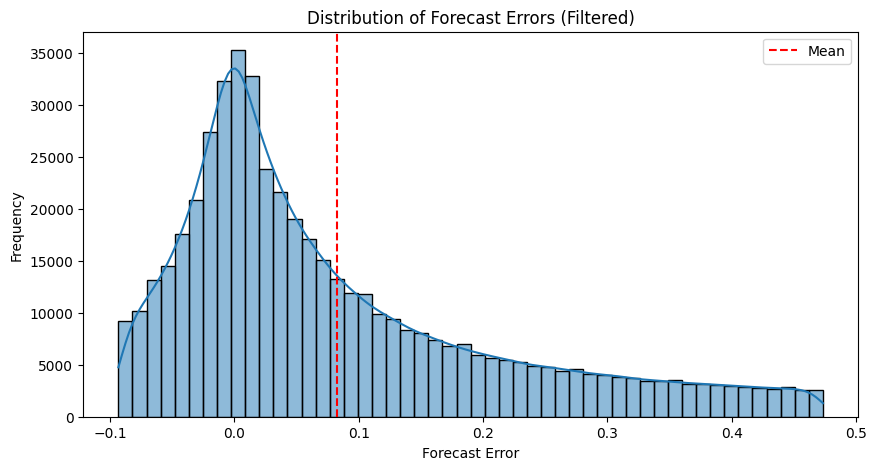

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of forecast errors after outlier removal
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['forecast_error'], bins=50, kde=True)
plt.axvline(df_filtered['forecast_error'].mean(), color='r', linestyle='dashed', label='Mean')
plt.xlabel("Forecast Error")
plt.ylabel("Frequency")
plt.title("Distribution of Forecast Errors (Filtered)")
plt.legend()
plt.show()


In [ ]:
# Summary statistics after filtering
print(df_filtered[['forecasted_eps', 'actual_eps', 'forecast_error']].describe())

# Count exact matches
exact_matches = df_filtered[df_filtered['forecast_error'] == 0].shape[0]
print(f"Exact Matches After Filtering: {exact_matches}")


       forecasted_eps     actual_eps  forecast_error
count   500284.000000  500284.000000   500284.000000
mean         0.371843       0.289274        0.082568
std          1.072640       1.070499        0.131247
min        -19.342791     -19.470000       -0.093333
25%          0.055000       0.000000       -0.010000
50%          0.254000       0.180000        0.038333
75%          0.537143       0.450000        0.145000
max        323.150000     323.000000        0.473333
Exact Matches After Filtering: 7142


In [ ]:
# Find companies with the highest average forecast errors
top_misforecasted = df_filtered.groupby('TICKER')['forecast_error'].mean().abs().sort_values(ascending=False).head(10)
print("Top 10 Companies with Highest Forecast Errors:\n", top_misforecasted)


Top 10 Companies with Highest Forecast Errors:
 TICKER
UAC1      0.472500
SGIO      0.472000
SQN       0.470000
OWWH      0.470000
BAYL      0.470000
TECU/2    0.470000
TANO      0.470000
LYND      0.465000
FLRA      0.462222
PTGX      0.461727
Name: forecast_error, dtype: float64


In [ ]:
# Compute standard deviation of forecast errors for each company
volatility_df = df.groupby("TICKER")["forecast_error"].std().reset_index()

# Sort in descending order to get the most volatile companies
volatility_df = volatility_df.sort_values(by="forecast_error", ascending=False).head(10)

# Display results
print(volatility_df)

      TICKER  forecast_error
18364   SSNL    52082.670083
2892    BAMI     2775.311485
3328    BKHT     2576.357029
8       0017     2538.719375
16619   RHOD     1919.461833
7136    ENIC      963.430313
8623     GCA      802.127667
17513   SFTB      734.458535
3213    BHIA      478.827141
19452   TOSB      478.629950


In [ ]:
sp100_tickers = [
    "AAPL", "MSFT", "AMZN", "GOOG", "TSLA", "BRK.B", "META", "V", "JNJ", "UNH",
    "XOM", "NVDA", "JPM", "PG", "HD", "MA", "CVX", "PFE", "ABBV", "LLY", "PEP",
    "KO", "TMO", "MCD", "COST", "WMT", "BAC", "MRK", "DIS", "CSCO", "AVGO",
    "ADBE", "ACN", "NFLX", "DHR", "TXN", "INTC", "LIN", "VZ", "HON", "IBM",
    "AMGN", "UNP", "QCOM", "NEE", "LOW", "SBUX", "MDT", "CAT", "GS", "RTX",
    "LMT", "BLK", "DE", "ISRG", "SPGI", "T", "NOW", "PLD", "MO", "AXP", "CME",
    "PYPL", "CHTR", "ZTS", "SO", "BMY", "DUK", "ABT", "TGT", "USB", "ADP",
    "AMD", "CVS", "PNC", "C", "EL", "GE", "CI", "CSX", "SCHW", "MMC", "NSC",
    "CB", "TJX", "BDX", "EQIX", "ADI", "FDX", "ICE", "CL", "ITW", "GM", "ECL",
    "MDLZ", "HUM", "FIS", "NOC", "D", "WM", "REGN", "LRCX"
]


In [ ]:
import pandas as pd

# Load merged dataset
df = pd.read_csv("merged_data.csv")

# Filter dataset for S&P 100 companies
df_sp100 = df[df["TICKER"].isin(sp100_tickers)]

# Display basic info
print(f"Total rows in merged dataset: {df.shape[0]}")
print(f"Rows for S&P 100 companies: {df_sp100.shape[0]}")
print(f"Columns available: {df_sp100.columns.tolist()}")

# Check if forecasted and actual earnings exist
print(df_sp100[["TICKER", "forecasted_eps", "actual_eps"]].dropna().head())


Total rows in merged dataset: 979900
Rows for S&P 100 companies: 13543
Columns available: ['TICKER', 'period_end_date', 'forecasted_eps', 'forecast_date', 'PENDS', 'actual_eps', 'forecast_error']
      TICKER  forecasted_eps  actual_eps
33652   AAPL        5.071912        1.64
33653   AAPL        1.352030        1.40
33654   AAPL        1.571121        1.53
33655   AAPL        2.197866        2.18
33656   AAPL        4.764436        6.13


In [ ]:
import yfinance as yf

# Select one company (AAPL as an example)
ticker = "AAPL"

# Fetch financial data
company = yf.Ticker(ticker)

# Extract financial statements
income_statement = company.financials.T  # Revenue, Net Income, etc.
balance_sheet = company.balance_sheet.T  # Total Assets, Liabilities, etc.
cash_flow = company.cashflow.T  # Operating Cash Flow, Free Cash Flow, etc.

# Display first few rows
print("Income Statement:\n", income_statement.head())
print("Balance Sheet:\n", balance_sheet.head())
print("Cash Flow Statement:\n", cash_flow.head())


Income Statement:
            Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-09-30                         0.0              0.241    134661000000.0   
2023-09-30                         0.0              0.147    125820000000.0   
2022-09-30                         0.0              0.162    130541000000.0   
2021-09-30                         0.0              0.133    123136000000.0   
2020-09-30                         NaN                NaN               NaN   

           Net Income From Continuing Operation Net Minority Interest  \
2024-09-30                                      93736000000.0           
2023-09-30                                      96995000000.0           
2022-09-30                                      99803000000.0           
2021-09-30                                      94680000000.0           
2020-09-30                                                NaN           

           Reconciled Depreciation Reconciled Cost Of Revenue      

In [ ]:
import yfinance as yf

# Select one company (AAPL as an example)
ticker = "AAPL"

# Fetch financial data
company = yf.Ticker(ticker)

# Extract financial statements
income_statement = company.financials.T
balance_sheet = company.balance_sheet.T
cash_flow = company.cashflow.T

# Print available columns
print("Income Statement Columns:", income_statement.columns.tolist())
print("Balance Sheet Columns:", balance_sheet.columns.tolist())
print("Cash Flow Columns:", cash_flow.columns.tolist())


Income Statement Columns: ['Tax Effect Of Unusual Items', 'Tax Rate For Calcs', 'Normalized EBITDA', 'Net Income From Continuing Operation Net Minority Interest', 'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA', 'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income', 'Normalized Income', 'Net Income From Continuing And Discontinued Operation', 'Total Expenses', 'Total Operating Income As Reported', 'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS', 'Basic EPS', 'Diluted NI Availto Com Stockholders', 'Net Income Common Stockholders', 'Net Income', 'Net Income Including Noncontrolling Interests', 'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income', 'Other Income Expense', 'Other Non Operating Income Expenses', 'Net Non Operating Interest Income Expense', 'Interest Expense Non Operating', 'Interest Income Non Operating', 'Operating Income', 'Operating Expense', 'Research And Development', 'Selling General And Administration', 

In [ ]:
import yfinance as yf
import pandas as pd

# Select one company (AAPL as an example)
ticker = "AAPL"

# Fetch financial data
company = yf.Ticker(ticker)

# Extract financial statements
income_statement = company.financials.T
balance_sheet = company.balance_sheet.T
cash_flow = company.cashflow.T

# Extract the latest available year dynamically
latest_year = income_statement.index[0]  # Most recent financial year

# Extract values using actual column names found in Step 1
latest_financials = {
    "Company": "Apple (AAPL)",
    "Sector": "Technology",
    "Revenue": income_statement.get("Total Revenue", pd.Series()).get(latest_year, "N/A"),
    "Net Income": income_statement.get("Net Income", pd.Series()).get(latest_year, "N/A"),
    "EBITDA": income_statement.get("EBITDA", pd.Series()).get(latest_year, "N/A"),
    "Total Assets": balance_sheet.get("Total Assets", pd.Series()).get(latest_year, "N/A"),
    "Total Liabilities": balance_sheet.get("Total Liabilities", pd.Series()).get(latest_year, "N/A"),
    "Cash & Short-Term Investments": balance_sheet.get("Cash Cash Equivalents And Short Term Investments", pd.Series()).get(latest_year, "N/A"),
    "Free Cash Flow": cash_flow.get("Free Cash Flow", pd.Series()).get(latest_year, "N/A"),
    "R&D Expense": income_statement.get("Research And Development", pd.Series()).get(latest_year, "N/A"),
    "Operating Income": income_statement.get("Operating Income", pd.Series()).get(latest_year, "N/A"),
    "Total Debt": balance_sheet.get("Total Debt", pd.Series()).get(latest_year, "N/A")
}

# Convert into structured text
gpt_prompt = f"""
Company: {latest_financials["Company"]}
Sector: {latest_financials["Sector"]}

Financial Overview:
- Revenue: ${latest_financials["Revenue"]}
- Net Income: ${latest_financials["Net Income"]}
- EBITDA: ${latest_financials["EBITDA"]}
- Total Assets: ${latest_financials["Total Assets"]}
- Total Liabilities: ${latest_financials["Total Liabilities"]}
- Cash & Short-Term Investments: ${latest_financials["Cash & Short-Term Investments"]}
- Free Cash Flow: ${latest_financials["Free Cash Flow"]}
- R&D Expense: ${latest_financials["R&D Expense"]}
- Operating Income: ${latest_financials["Operating Income"]}
- Total Debt: ${latest_financials["Total Debt"]}

Question:
Based on the above financials and market trends, predict the expected EPS (Earnings per Share) for the next quarter.
"""

# Print the structured GPT-4 prompt
print(gpt_prompt)



Company: Apple (AAPL)
Sector: Technology

Financial Overview:
- Revenue: $391035000000.0
- Net Income: $93736000000.0
- EBITDA: $134661000000.0
- Total Assets: $364980000000.0
- Total Liabilities: $N/A
- Cash & Short-Term Investments: $65171000000.0
- Free Cash Flow: $108807000000.0
- R&D Expense: $31370000000.0
- Operating Income: $123216000000.0
- Total Debt: $106629000000.0

Question:
Based on the above financials and market trends, predict the expected EPS (Earnings per Share) for the next quarter.



In [ ]:
import yfinance as yf
import pandas as pd
import time

# Initialize an empty list to store financial data
historical_financial_data = []

# Number of years to extract (adjustable)
num_years = 10

# Iterate over each S&P 100 ticker
for ticker in sp100_tickers:
    try:
        company = yf.Ticker(ticker)

        # Extract financial statements
        income_statement = company.financials.T  # Transpose to get years as rows
        balance_sheet = company.balance_sheet.T
        cash_flow = company.cashflow.T

        # Loop through the last 10 years
        for year in income_statement.index[:num_years]:
            company_data = {
                "Ticker": ticker,
                "Company": company.info.get("shortName", "Unknown"),
                "Sector": company.info.get("sector", "Unknown"),
                "Year": year.strftime('%Y-%m-%d'),  # Convert datetime to string
                "Revenue": income_statement.get("Total Revenue", pd.Series()).get(year, "N/A"),
                "Net Income": income_statement.get("Net Income", pd.Series()).get(year, "N/A"),
                "EBITDA": income_statement.get("EBITDA", pd.Series()).get(year, "N/A"),
                "Total Assets": balance_sheet.get("Total Assets", pd.Series()).get(year, "N/A"),
                "Total Liabilities": balance_sheet.get("Total Liabilities", pd.Series()).get(year, "N/A"),
                "Cash & Short-Term Investments": balance_sheet.get("Cash Cash Equivalents And Short Term Investments", pd.Series()).get(year, "N/A"),
                "Free Cash Flow": cash_flow.get("Free Cash Flow", pd.Series()).get(year, "N/A"),
                "R&D Expense": income_statement.get("Research And Development", pd.Series()).get(year, "N/A"),
                "Operating Income": income_statement.get("Operating Income", pd.Series()).get(year, "N/A"),
                "Total Debt": balance_sheet.get("Total Debt", pd.Series()).get(year, "N/A"),
            }

            # Append data for each year
            historical_financial_data.append(company_data)

        # Pause to prevent API rate limit issues
        time.sleep(1)

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
historical_financials_df = pd.DataFrame(historical_financial_data)

# Save as CSV
historical_financials_df.to_csv("sp100_10yr_financials.csv", index=False)

# Display for verification


NameError: name 'pd' is not defined

In [ ]:
!pip install ace_tools

In [ ]:
# Display the first few rows to verify
print(historical_financials_df.head())


  Ticker     Company      Sector        Year       Revenue    Net Income  \
0   AAPL  Apple Inc.  Technology  2024-09-30  3.910350e+11  9.373600e+10   
1   AAPL  Apple Inc.  Technology  2023-09-30  3.832850e+11  9.699500e+10   
2   AAPL  Apple Inc.  Technology  2022-09-30  3.943280e+11  9.980300e+10   
3   AAPL  Apple Inc.  Technology  2021-09-30  3.658170e+11  9.468000e+10   
4   AAPL  Apple Inc.  Technology  2020-09-30           NaN           NaN   

           EBITDA    Total Assets Total Liabilities  \
0  134661000000.0  364980000000.0               N/A   
1  125820000000.0  352583000000.0               N/A   
2  130541000000.0  352755000000.0               N/A   
3  123136000000.0  351002000000.0               N/A   
4             NaN             NaN               N/A   

  Cash & Short-Term Investments  Free Cash Flow    R&D Expense  \
0                 65171000000.0  108807000000.0  31370000000.0   
1                 61555000000.0   99584000000.0  29915000000.0   
2             

In [ ]:
import pandas as pd

# Load datasets
merged_data = pd.read_csv('filtered_merged_data.csv', low_memory=False)
financials_data = pd.read_csv('sp100_10yr_financials_with_predicted_eps.csv', low_memory=False)

# Attempt to convert date columns with specific format
date_format = "%Y-%m-%d"  # Adjust if necessary

merged_data['PENDS'] = pd.to_datetime(merged_data['PENDS'], errors='coerce', format=date_format)
financials_data['Year'] = pd.to_datetime(financials_data['Year'], errors='coerce', format=date_format)

# Drop rows where date conversion failed
merged_data = merged_data.dropna(subset=['PENDS'])
financials_data = financials_data.dropna(subset=['Year'])

# Select only relevant columns
merged_data = merged_data[['TICKER', 'PENDS', 'forecasted_eps', 'actual_eps']]
financials_data = financials_data[['Ticker', 'Year', 'Predicted_EPS']]

# Merge datasets on ticker and matching dates
comparison_df = merged_data.merge(
    financials_data,
    left_on=['TICKER', 'PENDS'],
    right_on=['Ticker', 'Year'],
    how='inner'
).drop(columns=['Ticker', 'Year'])

# Rename columns for clarity
comparison_df.rename(columns={'forecasted_eps': 'Analyst_Predicted_EPS',
                              'actual_eps': 'Actual_EPS',
                              'Predicted_EPS': 'ChatGPT_Predicted_EPS'}, inplace=True)



In [ ]:
print(merged_data['PENDS'].head())
print(financials_data['Year'].head())


Series([], Name: PENDS, dtype: datetime64[ns])
0   2024-09-30
1   2023-09-30
2   2022-09-30
3   2021-09-30
4   2020-09-30
Name: Year, dtype: datetime64[ns]


In [ ]:
merged_data = pd.read_csv("filtered_merged_data.csv")


In [ ]:
print(merged_data.head())


  TICKER period_end_date  forecasted_eps forecast_date      PENDS  actual_eps  \
0   0000       30JUN2016        0.284828     08AUG2014  30JUN2016        0.28   
1   0000       31DEC2014        0.594375     11MAR2014  31DEC2014        0.16   
2   0000       31MAR2016        0.265172     08AUG2014  31MAR2016        0.28   
3   0000       31MAR2015        0.182308     11MAR2014  31MAR2015        0.12   
4   0000       30SEP2014        0.192667     11MAR2014  30SEP2014        0.26   

   forecast_error  
0        0.004828  
1        0.434375  
2       -0.014828  
3        0.062308  
4       -0.067333  


In [ ]:
# Convert 'PENDS' to datetime using a custom format
merged_data['PENDS'] = pd.to_datetime(merged_data['PENDS'], format='%d%b%Y', errors='coerce')

# Check if conversion worked
print(merged_data[['PENDS']].dropna().head(10))


       PENDS
0 2016-06-30
1 2014-12-31
2 2016-03-31
3 2015-03-31
4 2014-09-30
5 2014-03-31
6 2015-06-30
7 2015-12-31
8 2015-09-30
9 2015-09-30


In [ ]:
import pandas as pd

# Load datasets
merged_data = pd.read_csv("filtered_merged_data.csv")
sp100_data = pd.read_csv("sp100_10yr_financials_with_predicted_eps.csv")

# Rename columns for consistency
sp100_data.rename(columns={"Ticker": "TICKER", "Year": "PENDS", "Predicted_EPS": "GPT_Predicted_EPS"}, inplace=True)

# Standardize date format (YYYY-MM-DD)
merged_data["PENDS"] = pd.to_datetime(merged_data["PENDS"], format="%Y-%m-%d", errors="coerce")
sp100_data["PENDS"] = pd.to_datetime(sp100_data["PENDS"], format="%Y-%m-%d", errors="coerce")

# Check for nulls in dates
print("Missing PENDS in merged_data:", merged_data["PENDS"].isnull().sum())
print("Missing PENDS in sp100_data:", sp100_data["PENDS"].isnull().sum())


Missing PENDS in merged_data: 500284
Missing PENDS in sp100_data: 0


In [ ]:
import pandas as pd

# Load the datasets
merged_data = pd.read_csv("filtered_merged_data_aligned.csv")
sp100_data = pd.read_csv("sp100_10yr_financials_with_predicted_eps.csv")

# Ensure consistent datetime format
merged_data["PENDS"] = pd.to_datetime(merged_data["PENDS"], errors="coerce")
sp100_data["Year"] = pd.to_datetime(sp100_data["Year"], errors="coerce")

# Merge datasets on TICKER and date (PENDS & Year)
comparison_df = pd.merge(
    merged_data[['TICKER', 'PENDS', 'forecasted_eps', 'actual_eps']],
    sp100_data[['Ticker', 'Year', 'Predicted_EPS']],
    left_on=['TICKER', 'PENDS'],
    right_on=['Ticker', 'Year'],
    how='inner'  # Ensures we only keep matching records
)

# Drop redundant columns
comparison_df.drop(columns=['Ticker', 'Year'], inplace=True)

# Rename columns for clarity
comparison_df.rename(columns={'forecasted_eps': 'Analyst_EPS',
                              'actual_eps': 'Actual_EPS',
                              'Predicted_EPS': 'GPT_Predicted_EPS'}, inplace=True)

# Display dataset info
print(comparison_df.info())

# Save to CSV
comparison_df.to_csv("eps_comparison.csv", index=False)

# Display the first few rows
print(comparison_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TICKER             10 non-null     object        
 1   PENDS              10 non-null     datetime64[ns]
 2   Analyst_EPS        10 non-null     float64       
 3   Actual_EPS         10 non-null     float64       
 4   GPT_Predicted_EPS  7 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 532.0+ bytes
None
  TICKER      PENDS  Analyst_EPS  Actual_EPS  GPT_Predicted_EPS
0    AMD 2021-12-31     1.341844        0.92           0.202026
1    AMD 2020-12-31     0.735330        0.52                NaN
2    AMD 2023-12-31     2.657247        2.65           0.039537
3    CSX 2022-12-31     2.367930        1.92           0.283287
4    CSX 2023-12-31     1.764583        1.85           0.255997


In [ ]:
print("Unique tickers in merged dataset:", merged_data["TICKER"].nunique())
print("Unique tickers in GPT dataset:", sp100_data["Ticker"].nunique())

print("Unique dates in merged dataset:", merged_data["PENDS"].nunique())
print("Unique dates in GPT dataset:", sp100_data["Year"].nunique())

print("Merged dataset size:", merged_data.shape)
print("GPT dataset size:", sp100_data.shape)
print("Final comparison dataset size:", comparison_df.shape)


Unique tickers in merged dataset: 5848
Unique tickers in GPT dataset: 101
Unique dates in merged dataset: 45
Unique dates in GPT dataset: 47
Merged dataset size: (38646, 7)
GPT dataset size: (467, 15)
Final comparison dataset size: (10, 5)


In [ ]:
# Filter merged data to only include tickers present in GPT dataset
sp100_tickers = sp100_data["Ticker"].unique()
filtered_merged_data = merged_data[merged_data["TICKER"].isin(sp100_tickers)]

print("Filtered merged dataset size:", filtered_merged_data.shape)  # Should be much smaller now


Filtered merged dataset size: (294, 7)


In [ ]:
# Find tickers that exist in GPT dataset but not in filtered merged dataset
missing_tickers = set(sp100_tickers) - set(filtered_merged_data["TICKER"])

print("Tickers in GPT dataset but missing in filtered merged dataset:", missing_tickers)
print("Count of missing tickers:", len(missing_tickers))


Tickers in GPT dataset but missing in filtered merged dataset: {'ZTS', 'BLK', 'PNC', 'MDLZ', 'NOW', 'META', 'PLD', 'GOOG', 'VZ', 'JPM', 'ACN', 'MA', 'UNH', 'RTX', 'HON', 'LMT', 'LIN', 'DHR', 'ADP', 'BAC', 'NEE', 'AVGO', 'FIS', 'V', 'XOM', 'SCHW', 'USB', 'GS', 'COST', 'WM', 'CVS', 'ECL', 'TJX', 'T', 'GM', 'CVX', 'CB', 'TGT', 'C', 'ICE', 'PYPL', 'SPGI', 'CHTR'}
Count of missing tickers: 43


In [ ]:
# Find unique tickers in the filtered merged dataset
merged_tickers = set(filtered_merged_data["TICKER"].unique())

# Find tickers that may have alternate names
possible_matches = {ticker for ticker in merged_tickers if any(gt in ticker for gt in missing_tickers)}

print("Potential alternate names found in merged dataset:", possible_matches)


Potential alternate names found in merged dataset: {'INTC', 'LRCX', 'MCD', 'CL', 'ABT', 'CME', 'NSC', 'ABBV', 'TSLA', 'WMT', 'TXN', 'CSCO', 'CSX', 'TMO', 'MMC', 'MDT', 'NOC', 'CI', 'CAT', 'MSFT', 'NVDA', 'QCOM', 'ITW'}


In [ ]:
# Find missing tickers that may have been removed due to filtering
missing_in_full_data = set(missing_tickers) & set(merged_data["TICKER"])

print("Missing tickers that exist in full merged dataset:", missing_in_full_data)


Missing tickers that exist in full merged dataset: set()


In [ ]:
df = pd.read_csv("Final_Combined_Dataset.csv")

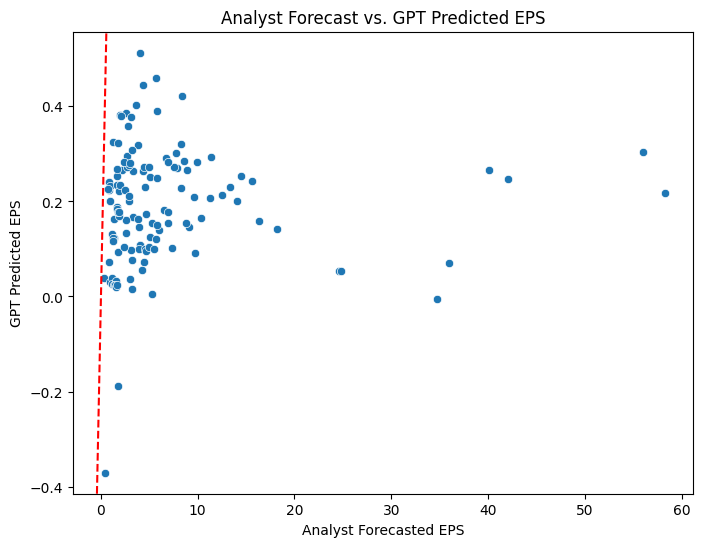

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot comparing Analyst Forecasts and GPT Predicted EPS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["forecasted_eps"], y=df["GPT_Predicted_EPS"])
plt.xlabel("Analyst Forecasted EPS")
plt.ylabel("GPT Predicted EPS")
plt.title("Analyst Forecast vs. GPT Predicted EPS")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed")  # Reference line (y = x)
plt.show()


<Figure size 1000x600 with 0 Axes>

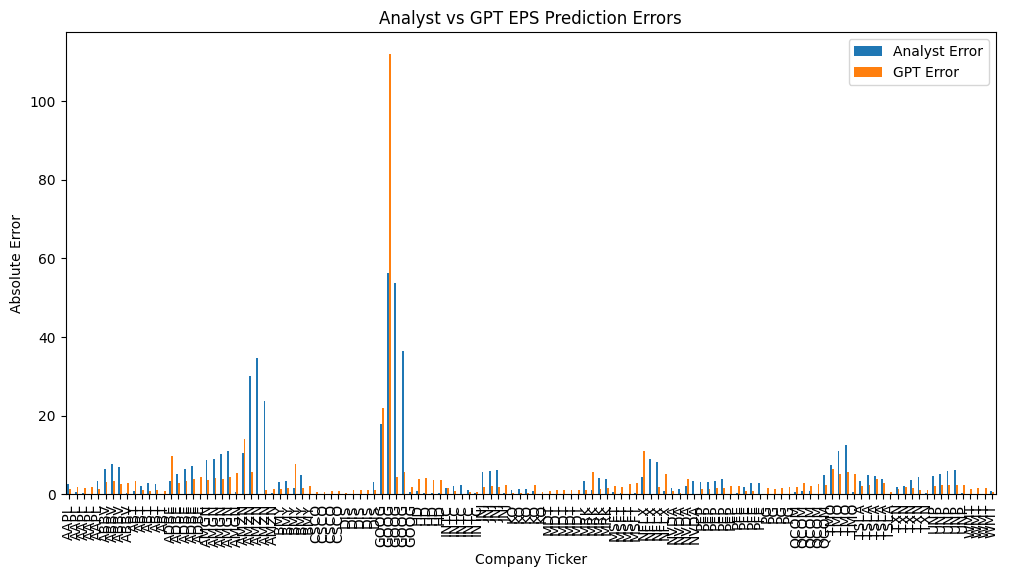

In [ ]:
# Calculate absolute errors
df["Analyst_Error"] = abs(df["forecasted_eps"] - df["actual_eps"])
df["GPT_Error"] = abs(df["GPT_Predicted_EPS"] - df["actual_eps"])

# Plot error comparison
plt.figure(figsize=(10, 6))
df[["TICKER", "Analyst_Error", "GPT_Error"]].set_index("TICKER").plot(kind="bar", figsize=(12,6))
plt.xlabel("Company Ticker")
plt.ylabel("Absolute Error")
plt.title("Analyst vs GPT EPS Prediction Errors")
plt.legend(["Analyst Error", "GPT Error"])
plt.xticks(rotation=90)
plt.show()


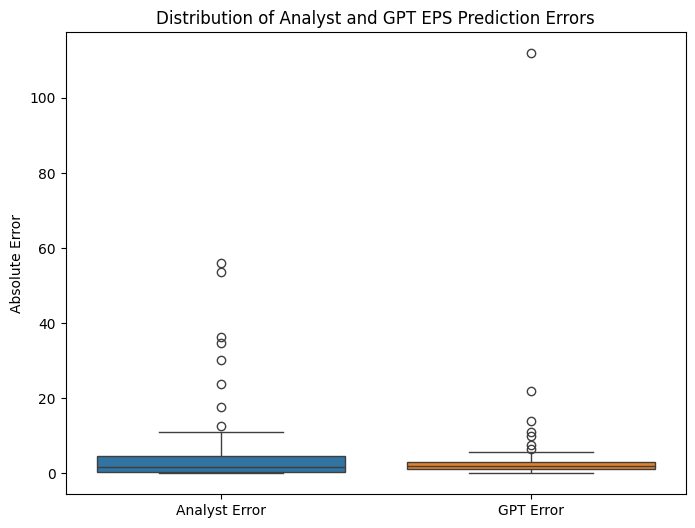

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Analyst_Error", "GPT_Error"]])
plt.ylabel("Absolute Error")
plt.title("Distribution of Analyst and GPT EPS Prediction Errors")
plt.xticks([0, 1], ["Analyst Error", "GPT Error"])
plt.show()


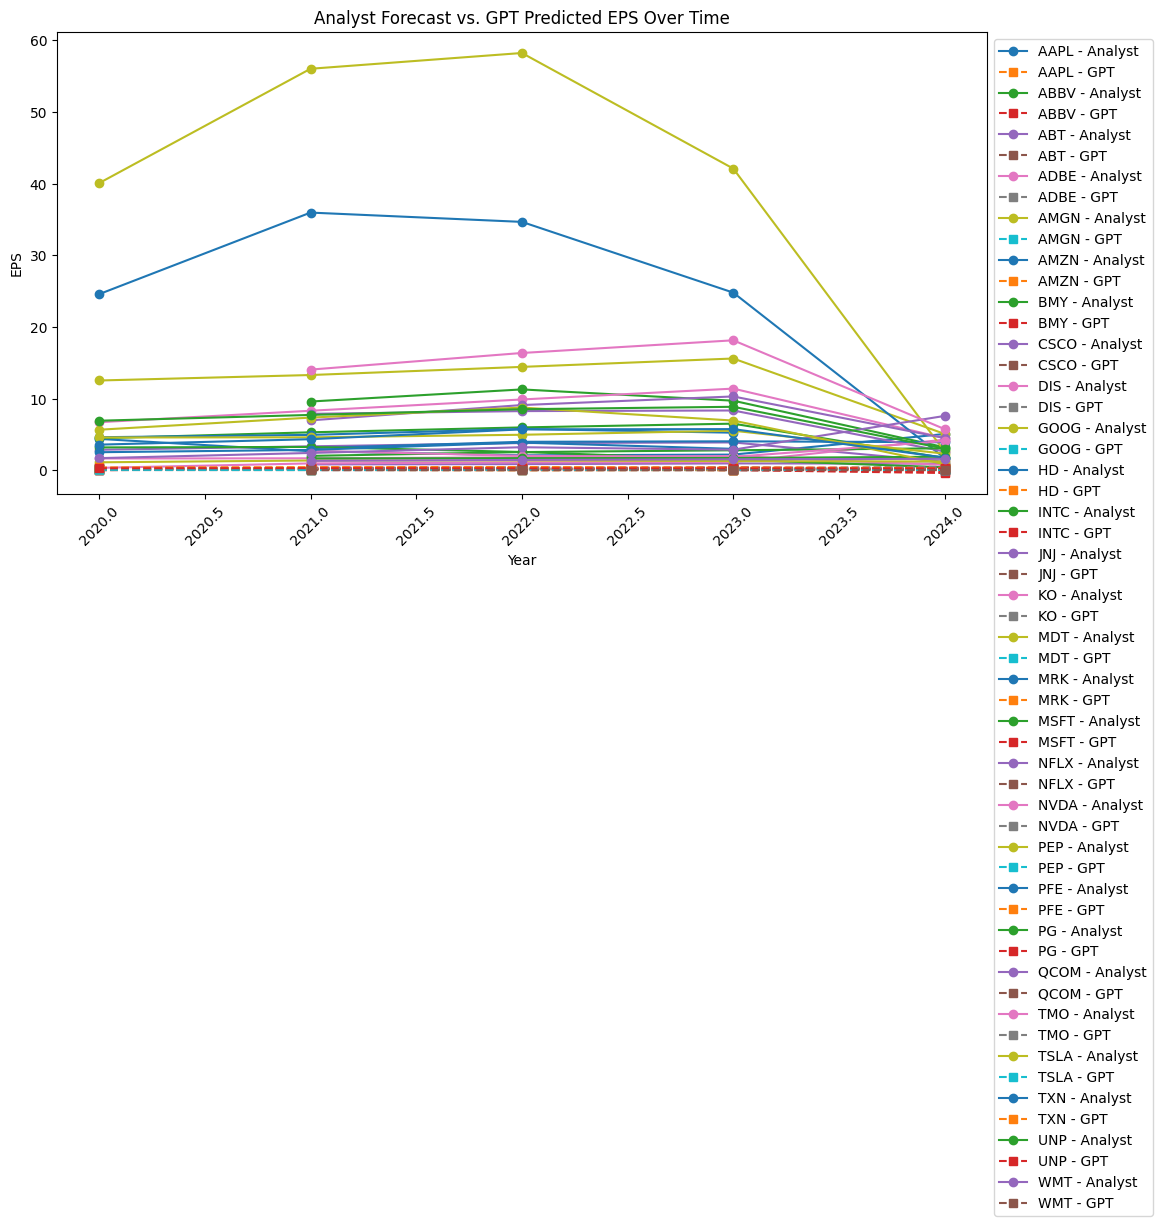

In [ ]:
plt.figure(figsize=(12, 6))
for ticker in df["TICKER"].unique():
    subset = df[df["TICKER"] == ticker]
    plt.plot(subset["Year"], subset["forecasted_eps"], marker="o", linestyle="-", label=f"{ticker} - Analyst")
    plt.plot(subset["Year"], subset["GPT_Predicted_EPS"], marker="s", linestyle="--", label=f"{ticker} - GPT")

plt.xlabel("Year")
plt.ylabel("EPS")
plt.title("Analyst Forecast vs. GPT Predicted EPS Over Time")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


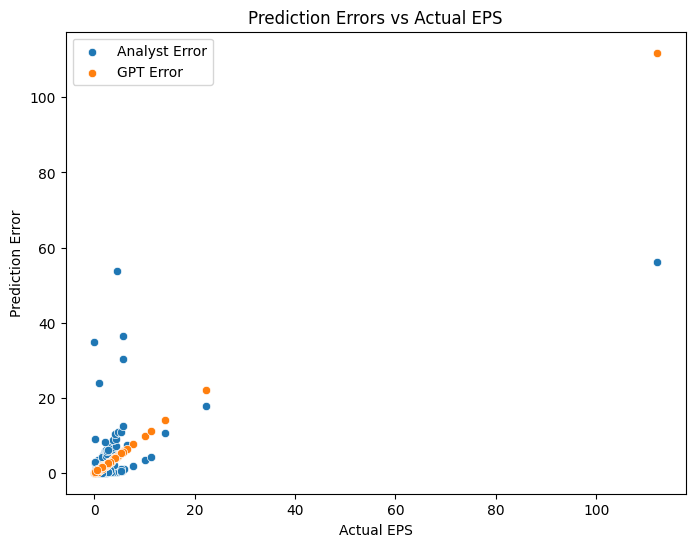

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["actual_eps"], y=df["Analyst_Error"], label="Analyst Error")
sns.scatterplot(x=df["actual_eps"], y=df["GPT_Error"], label="GPT Error")
plt.xlabel("Actual EPS")
plt.ylabel("Prediction Error")
plt.title("Prediction Errors vs Actual EPS")
plt.legend()
plt.show()


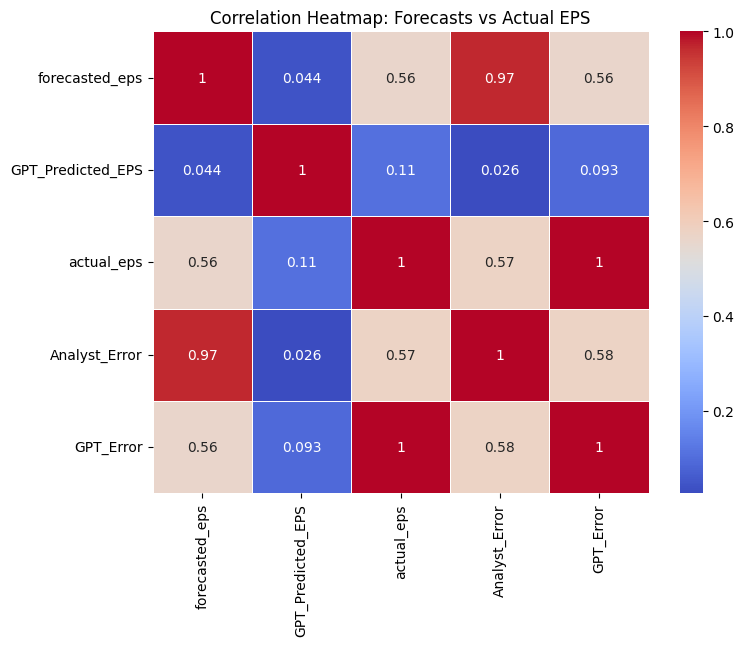

In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = df[["forecasted_eps", "GPT_Predicted_EPS", "actual_eps", "Analyst_Error", "GPT_Error"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Forecasts vs Actual EPS")
plt.show()


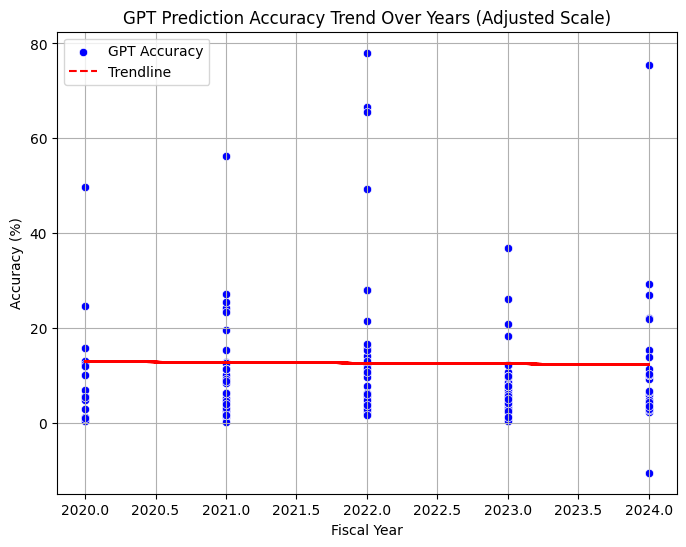

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure the dataset has necessary columns
df_chart = df[["Year", "actual_eps", "GPT_Predicted_EPS"]].copy()

# Calculate GPT Prediction Accuracy (percentage closeness to actual EPS)
df_chart["GPT_Accuracy"] = 100 - (abs(df_chart["GPT_Predicted_EPS"] - df_chart["actual_eps"]) / abs(df_chart["actual_eps"])) * 100

# Remove extreme outliers (accuracy below -100% or above 100%)
df_chart_filtered = df_chart[(df_chart["GPT_Accuracy"] >= -100) & (df_chart["GPT_Accuracy"] <= 100)]

# Fit a new trendline after outlier removal
z1_filtered = np.polyfit(df_chart_filtered["Year"], df_chart_filtered["GPT_Accuracy"], 1)
trendline_gpt_filtered = np.poly1d(z1_filtered)(df_chart_filtered["Year"])

# Create the adjusted plot
plt.figure(figsize=(8, 6))

# Scatter plot of GPT accuracy over years (filtered)
sns.scatterplot(x=df_chart_filtered["Year"], y=df_chart_filtered["GPT_Accuracy"], label="GPT Accuracy", color="blue")

# Trendline for GPT accuracy
plt.plot(df_chart_filtered["Year"], trendline_gpt_filtered, "r--", label="Trendline")

# Labels and Title
plt.xlabel("Fiscal Year")
plt.ylabel("Accuracy (%)")
plt.title("GPT Prediction Accuracy Trend Over Years (Adjusted Scale)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


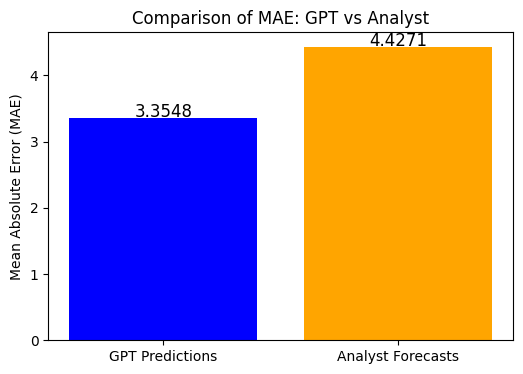

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae_gpt = mean_absolute_error(df["actual_eps"], df["GPT_Predicted_EPS"])
mae_analyst = mean_absolute_error(df["actual_eps"], df["forecasted_eps"])

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(["GPT Predictions", "Analyst Forecasts"], [mae_gpt, mae_analyst], color=["blue", "orange"])

# Add labels and title
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE: GPT vs Analyst")

# Display the values on top of the bars
plt.text(0, mae_gpt + 0.01, f"{mae_gpt:.4f}", ha="center", fontsize=12)
plt.text(1, mae_analyst + 0.01, f"{mae_analyst:.4f}", ha="center", fontsize=12)

# Show the plot
plt.show()
